In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('yelp.csv')

In [3]:
df.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   business_id  10000 non-null  object
 1   date         10000 non-null  object
 2   review_id    10000 non-null  object
 3   stars        10000 non-null  int64 
 4   text         10000 non-null  object
 5   type         10000 non-null  object
 6   user_id      10000 non-null  object
 7   cool         10000 non-null  int64 
 8   useful       10000 non-null  int64 
 9   funny        10000 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 781.4+ KB


In [5]:
df.describe()

,stars,cool,useful,funny
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,3.777500,0.876800,1.409300,0.701300
std,1.214636,2.067861,2.336647,1.907942
min,1.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,0.000000,0.000000
50%,4.000000,0.000000,1.000000,0.000000
75%,5.000000,1.000000,2.000000,1.000000
max,5.000000,77.000000,76.000000,57.000000


In [6]:
df['text length'] = df['text'].apply(len)

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

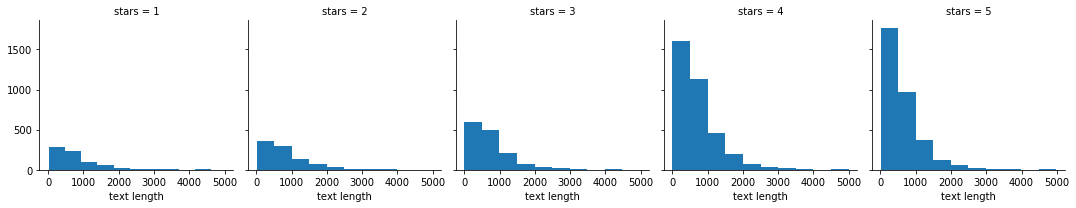

In [11]:
g = sns.FacetGrid(df, col='stars')
g.map(plt.hist,'text length' )

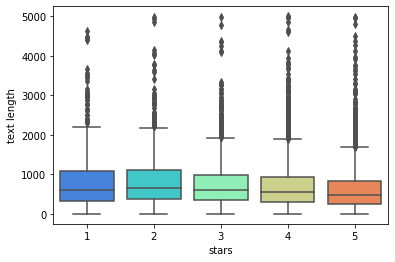

In [13]:
sns.boxplot(df['stars'], df['text length'],palette='rainbow')

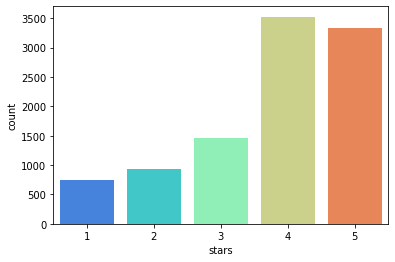

In [17]:
sns.countplot(x=df['stars'], palette='rainbow')

In [19]:
stars = df.groupby('stars').mean()
stars

,cool,useful,funny,text length
stars,,,,
1,0.576769,1.604806,1.056075,826.515354
2,0.719525,1.563107,0.875944,842.256742
3,0.788501,1.306639,0.694730,758.498289
4,0.954623,1.395916,0.670448,712.923142
5,0.944261,1.381780,0.608631,624.999101


In [20]:
stars.corr()

,cool,useful,funny,text length
cool,1.000000,-0.743329,-0.944939,-0.857664
useful,-0.743329,1.000000,0.894506,0.699881
funny,-0.944939,0.894506,1.000000,0.843461
text length,-0.857664,0.699881,0.843461,1.000000


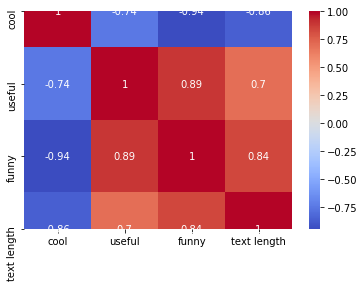

In [24]:
sns.heatmap(stars.corr(), cmap = 'coolwarm', annot =True)

In [27]:
yelp_class = df[(df['stars']==1) | (df['stars']==5)]

In [34]:
yelp_class.shape

(4086, 11)

In [35]:
X = yelp_class['text']
y = yelp_class['stars']

In [36]:
from sklearn.feature_extraction.text import CountVectorizer

In [37]:
X = CountVectorizer().fit_transform(X)

In [38]:
from sklearn.model_selection import train_test_split

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [40]:
from sklearn.naive_bayes import MultinomialNB

In [41]:
model = MultinomialNB()

In [42]:
model.fit(X_train, y_train)

MultinomialNB()

In [45]:
pred = model.predict(X_test)

In [46]:
from sklearn.metrics import classification_report,confusion_matrix

In [47]:
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

[[159  69]
 [ 22 976]]


              precision    recall  f1-score   support

           1       0.88      0.70      0.78       228
           5       0.93      0.98      0.96       998

    accuracy                           0.93      1226
   macro avg       0.91      0.84      0.87      1226
weighted avg       0.92      0.93      0.92      1226



In [48]:
from sklearn.feature_extraction.text import TfidfTransformer

In [49]:
from sklearn.pipeline import Pipeline

In [51]:
pipeline = Pipeline([
    ('cvz',CountVectorizer()),
    ('tfid',TfidfTransformer()),
    ('model',MultinomialNB())
])

In [57]:
X_train, X_test, y_train, y_test = train_test_split(yelp_class['text'], yelp_class['stars'], test_size=0.3, random_state=101)

In [59]:
pipeline.fit(X_train,y_train)

Pipeline(steps=[('cvz', CountVectorizer()), ('tfid', TfidfTransformer()),
                ('model', MultinomialNB())])

In [61]:
pred1 = pipeline.predict(X_test)

In [62]:
print(confusion_matrix(y_test,pred1))
print('\n')
print(classification_report(y_test,pred1))

[[  0 228]
 [  0 998]]


              precision    recall  f1-score   support

           1       0.00      0.00      0.00       228
           5       0.81      1.00      0.90       998

    accuracy                           0.81      1226
   macro avg       0.41      0.50      0.45      1226
weighted avg       0.66      0.81      0.73      1226



C:\Users\HP\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [63]:
from sklearn.ensemble import RandomForestClassifier

In [64]:
pipeline2 = Pipeline([
    ('cvz',CountVectorizer()),
    ('model',RandomForestClassifier())
])

In [65]:
pipeline2.fit(X_train,y_train)

Pipeline(steps=[('cvz', CountVectorizer()),
                ('model', RandomForestClassifier())])

In [67]:
pred2 = pipeline.predict(X_test)

In [68]:
print(confusion_matrix(y_test,pred2))
print('\n')
print(classification_report(y_test,pred2))

[[  0 228]
 [  0 998]]


              precision    recall  f1-score   support

           1       0.00      0.00      0.00       228
           5       0.81      1.00      0.90       998

    accuracy                           0.81      1226
   macro avg       0.41      0.50      0.45      1226
weighted avg       0.66      0.81      0.73      1226



C:\Users\HP\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
